# 1. Data Preparation

In [ ]:
# Since the dataset is too big, we read it from google drive instead of uploading to google colab as it'll take too much time

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 

# Checking if the data exists and valid or not
df = pd.read_csv("/content/drive/MyDrive/estatePrice.csv")
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [ ]:
# Check the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [ ]:
# Check how many rows and columns in this dataset
# Based on the results, we have 5.4 Million rows of data and 13 columns
print(f"(Rows, Columns) = {df.shape}")

# Check if there's any duplicated row in this dataset (Dupicated rows may affect our analysis)
print(f"Duplicated rows in this dataset = {df.duplicated().any()}")

(Rows, Columns) = (5477006, 13)
Duplicated rows in this dataset = True


In [ ]:
# Since there are duplicated rows, we have to eliminate them to prevent overfit

# 1. Check how many duplicated rows
print(f"Duplicated rows total: {df.duplicated().sum()}")

# 2. Display all the duplicated rows
display(df[df.duplicated()].sort_values(by="price"))

# 3. Remove all the duplicated rows from the dataset
df = df.drop_duplicates()
display(f"\n\nAny duplicated rows in dataset {df.duplicated().any()}")


Duplicated rows total: 1523


,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
241448,860455,2018-10-10,15:02:50,55.017756,83.003578,9654,1,6,10,1,32.47,5.0,11
249086,892925,2018-10-11,11:41:09,55.017756,83.003578,9654,1,3,10,1,32.47,5.0,11
843459,950000,2018-12-30,03:35:02,54.941999,82.963010,9654,1,6,10,1,33.00,3.0,1
692044,950000,2018-12-09,01:43:09,54.947786,82.970996,9654,1,7,10,1,32.47,5.0,11
3549477,987737,2020-03-31,06:41:25,55.030393,83.015545,9654,1,10,10,-1,32.47,5.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866945,31950000,2019-05-27,08:01:01,55.681290,37.551780,3,2,7,20,3,105.00,14.0,11
2066950,32900000,2019-06-25,21:28:16,55.681290,37.551780,3,2,4,20,3,119.00,18.0,1
3238686,44999000,2020-02-03,20:57:13,55.770195,37.636003,3,3,4,8,4,116.00,15.0,1
1851681,62900000,2019-05-23,19:08:01,55.783205,37.599597,3,2,7,10,3,104.00,28.0,11


'\n\nAny duplicated rows in dataset False'

In [ ]:
# Check any null values in the dataset
df.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [ ]:
# After checking missing rows and duplicated rows, it's time to handle the column datatype
# In order to carry out time series data analysis, we need to convert the date time from object datatype to datetime64 datatype

# In our case, we are combining the Date column and Time column for easier time, and convert the whole column to datetime64 datatype
df.loc[:,'DateTime'] = pd.to_datetime(df.date.astype(str)+' '+df.time.astype(str))
df = df.drop(['date', 'time'], axis=1)

# Remove the time from the date column
df['date'] = pd.to_datetime(df['DateTime'].dt.date)
df = df.drop(['DateTime'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475483 entries, 0 to 5477005
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   geo_lat        float64       
 2   geo_lon        float64       
 3   region         int64         
 4   building_type  int64         
 5   level          int64         
 6   levels         int64         
 7   rooms          int64         
 8   area           float64       
 9   kitchen_area   float64       
 10  object_type    int64         
 11  date           datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 543.1 MB


In [ ]:
# Let's see what we have until now
display(df.head())
display(df.describe())

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
0,6050000,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,2018-02-19
1,8650000,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,2018-02-27
2,4000000,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,2018-02-28
3,1850000,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,2018-03-01
4,5450000,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,2018-03-01


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06,5.475483e+06
mean,4.421478e+06,5.403784e+01,5.324654e+01,4.307440e+03,1.949033e+00,6.213816e+00,1.139749e+01,1.726213e+00,5.391823e+01,1.062817e+01,3.943830e+00
std,2.151016e+07,4.622977e+00,2.074788e+01,3.307991e+03,1.038568e+00,4.956792e+00,6.534970e+00,1.082136e+00,3.335522e+01,9.793369e+00,4.557649e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337726e+01,3.777797e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517128e+01,4.307021e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.800020e+06,5.622613e+01,6.564969e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [ ]:
# Remove outliers

# 1. price column
# Based on the description of the dataset above, we can see that there are negative values in price which are impossible.
# Furthermore, it is also nearly impossible for the estate price to be sold below 10k russia currency. 
# Based on studies, studies have shown that the most expensive estate sold was 100M, but there are some values here exceeding the price.
# Display the Unreasonable value
display(df.loc[(df['price'] < 10000)  | (df['price'] > 10000000)])
# Since there only 300+ rows with negative price value compared to 5.4 Million datas, it is better to just remove the rows to prevent confusion
df = df.drop(df.loc[(df['price'] < 10000)  | (df['price'] > 10000000)].index) 
# Show progress until now
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
29,11500000,55.798921,37.738090,3,1,14,16,3,64.9,8.0,1,2018-04-03
34,10200000,55.655307,37.614605,3,2,7,14,2,52.8,10.0,1,2018-04-07
44,11500000,55.701330,37.507412,3,1,14,17,1,42.0,12.0,1,2018-04-18
56,20900000,55.730785,37.631424,3,3,6,10,3,80.0,8.2,1,2018-05-01
59,12000000,55.627136,37.591736,3,1,4,9,3,64.9,7.0,1,2018-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...
5476999,12850000,55.701280,37.642654,3,2,12,24,1,41.0,9.0,1,2021-05-01
5477001,19739760,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11,2021-05-01
5477002,12503160,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11,2021-05-01
5477004,11831910,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11,2021-05-01


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06,5.122224e+06
mean,3.377137e+06,5.389313e+01,5.429050e+01,4.505950e+03,1.943801e+00,6.056933e+00,1.112209e+01,1.659719e+00,5.129316e+01,1.019455e+01,3.888374e+00
std,2.001753e+06,4.656294e+00,2.087049e+01,3.280896e+03,1.049947e+00,4.810266e+00,6.348069e+00,1.053122e+00,2.949125e+01,9.158201e+00,4.532222e+00
min,1.000000e+04,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.888000e+06,5.328895e+01,3.806867e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.780000e+01,7.000000e+00,1.000000e+00
50%,2.800000e+06,5.506938e+01,4.503512e+01,3.019000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.691000e+01,9.000000e+00,1.000000e+00
75%,4.300000e+06,5.615518e+01,8.285075e+01,6.817000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,6.100000e+01,1.200000e+01,1.100000e+01
max,1.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,7.856000e+03,9.999000e+03,1.100000e+01


In [ ]:
# Remove outliers 
# 2. rooms
# Assume -1, -2, 0 in rooms means open space-layout studio, or specially designed rooms
# Therefore it is better to convert all of the values into 0
display(df.loc[df['rooms'] < 1])
df['rooms'] = df['rooms'].apply(lambda x: 0 if x < 0 else x)
# Check for any negatives values in the room column
print(f"Any rooms with negative rooms {df.loc[df['rooms'] < 0].any().any()}")


display(df.loc[df['rooms'] > 3])
df = df.drop(df.loc[df['rooms'] > 3].index)
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
32,2500000,43.634694,39.727167,2843,2,2,8,-1,25.0,5.0,1,2018-04-04
135,2991978,59.700951,30.395886,2661,1,1,5,-1,23.6,4.6,11,2018-07-31
289,4990050,55.673715,37.745559,3,2,8,15,-1,25.6,4.7,11,2018-09-08
1540,590000,53.379848,83.706244,6817,3,3,5,-1,14.0,4.0,1,2018-09-08
1560,670000,53.379754,83.705463,6817,3,3,5,-1,19.0,4.0,1,2018-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...
5476956,6230840,55.804736,37.750898,3,1,8,33,-1,19.6,5.0,11,2021-05-01
5476962,4339000,55.700399,37.960624,81,2,8,17,-1,25.0,8.0,1,2021-05-01
5476974,7504290,55.805465,37.714470,3,2,2,32,-1,19.9,5.8,11,2021-05-01
5476993,7136640,55.848186,37.561906,3,1,14,19,-1,25.2,6.5,11,2021-05-01


Any rooms with negative rooms False


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
31,9000000,56.311248,44.027117,2871,3,6,10,4,112.0,11.0,1,2018-04-04
58,3650000,56.386103,61.926393,6171,1,1,9,5,97.8,11.0,1,2018-05-11
64,4800000,51.806503,107.658754,9579,3,2,5,4,109.0,11.0,1,2018-05-16
74,2400000,56.875757,53.291533,1010,1,4,5,4,58.0,5.6,1,2018-05-31
121,3300000,47.138330,39.750718,3230,3,6,9,4,74.0,10.0,1,2018-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...
5476777,2270000,55.246425,61.370958,5282,4,3,5,4,74.4,8.6,1,2021-05-01
5476796,7367000,59.908398,30.347183,2661,3,1,5,4,49.8,10.0,1,2021-05-01
5476832,5500000,57.131338,65.528330,3991,3,2,9,4,116.0,15.0,1,2021-05-01
5476907,8600000,58.000515,56.245642,5520,2,25,25,4,97.0,12.0,1,2021-05-01


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06,4.999424e+06
mean,3.344449e+06,5.389339e+01,5.420648e+01,4.497935e+03,1.941589e+00,6.086287e+00,1.118880e+01,1.660427e+00,5.029107e+01,1.015097e+01,3.940589e+00
std,1.985933e+06,4.655318e+00,2.084235e+01,3.287806e+03,1.049334e+00,4.827796e+00,6.369199e+00,8.508933e-01,2.805578e+01,9.182124e+00,4.556186e+00
min,1.000000e+04,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.850000e+06,5.330558e+01,3.804823e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.730000e+01,7.000000e+00,1.000000e+00
50%,2.800000e+06,5.506915e+01,4.465059e+01,3.019000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.600000e+01,9.000000e+00,1.000000e+00
75%,4.280000e+06,5.614677e+01,8.285075e+01,6.817000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,6.000000e+01,1.200000e+01,1.100000e+01
max,1.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,3.000000e+00,7.660000e+03,9.999000e+03,1.100000e+01


In [ ]:
# Rmove outliers
# 3. area
# Based on the description data, we've found out that there are negative values in area which is impossible
# And area with lesser than 10m^2 is basically impossible to live in. We have also found out ridiculously large area which only belongs to industrial factory and not for real estate
# Therefore, it is better to drop the area with lesser than 10m^2 and larger than 2000m^2
display(df.loc[(df['area'] < 10)  | (df['area'] > 2000)])
df = df.drop(df.loc[(df['area'] < 10) | (df['area']>2000)].index)
display(df.describe())
print(f"Any room with lesser than 10m^2 or larger than 2000m^2: {df.loc[(df['area'] < 10) | (df['area'] > 2000)].any().any()}")

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
502,4599000,55.042980,82.951150,9654,3,6,10,2,5.60,7.7,1,2018-09-08
6232,4599000,55.042980,82.951150,9654,3,6,10,2,5.60,7.7,1,2018-09-09
11109,4599000,55.042980,82.951150,9654,3,6,10,2,5.60,7.7,1,2018-09-10
16236,1650000,51.998611,113.559165,10160,1,3,5,2,6.00,6.0,1,2018-09-10
19101,4599000,55.042980,82.951150,9654,3,6,10,2,5.60,7.7,1,2018-09-11
...,...,...,...,...,...,...,...,...,...,...,...,...
5393688,4500000,42.964617,47.493210,4007,3,4,5,2,5000.00,9.0,1,2021-04-25
5427178,7500000,59.993847,30.357164,2661,0,10,11,1,3.80,0.5,1,2021-04-27
5432473,5200000,55.834835,38.402951,81,2,7,17,0,9.00,10.7,1,2021-04-29
5434956,230000,55.030393,83.015545,9654,1,10,10,1,8.07,0.1,1,2021-04-29


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06,4.992930e+06
mean,3.345288e+06,5.389588e+01,5.420993e+01,4.498942e+03,1.941119e+00,6.088415e+00,1.119325e+01,1.660198e+00,5.026709e+01,1.015605e+01,3.943290e+00
std,1.986041e+06,4.653206e+00,2.084161e+01,3.288366e+03,1.049260e+00,4.828774e+00,6.369334e+00,8.508926e-01,2.038859e+01,8.763361e+00,4.557406e+00
min,1.000000e+04,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,1.000000e-02,1.000000e+00
25%,1.850000e+06,5.330872e+01,3.804711e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.740000e+01,7.000000e+00,1.000000e+00
50%,2.800000e+06,5.506923e+01,4.465362e+01,3.019000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.600000e+01,9.000000e+00,1.000000e+00
75%,4.280000e+06,5.614706e+01,8.285077e+01,6.817000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,6.000000e+01,1.200000e+01,1.100000e+01
max,1.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,3.000000e+00,2.000000e+03,9.999000e+03,1.100000e+01


Any room with lesser than 10m^2 or larger than 2000m^2: False


In [ ]:
# Rmove outliers
# 3. kitchen_area
# Based on the description data, we've found out that there are negative values in kitchen_area which is impossible
# A kitchen_area with < 5m^2 is barely functional and would violate the building code and regulations. Furthermore, it is also shown that there are a few records with ridiculously large kitchens.
# Therefore, it is better to drop the rows with kitchen_area lesser than 5m^2 and more than 50m^2
display(df.loc[(df['kitchen_area'] < 5) | (df['kitchen_area'] > 50)])
df = df.drop(df.loc[(df['kitchen_area'] < 5) | (df['kitchen_area'] > 50)].index)
display(df.describe())
print(f"Any room with lesser than 10m^2 or larger than 50m^2: {df.loc[(df['kitchen_area'] < 5) | (df['kitchen_area'] > 50)].any().any()}")


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
130,1320000,54.186455,45.145959,5241,3,2,2,2,39.00,4.2,1,2018-07-27
135,2991978,59.700951,30.395886,2661,1,1,5,0,23.60,4.6,11,2018-07-31
216,2153836,59.845437,30.115149,2661,2,6,8,1,28.90,4.8,11,2018-08-31
227,1749000,45.028744,38.978601,2843,3,1,1,1,28.00,4.0,1,2018-09-04
254,990000,45.097206,39.029800,2843,2,3,3,1,17.90,4.0,1,2018-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...
5476863,3865000,59.921214,30.329496,2661,3,5,6,0,19.49,2.0,1,2021-05-01
5476865,4580000,59.823643,30.343078,2661,0,5,18,0,25.00,4.0,11,2021-05-01
5476893,6350000,55.816520,37.342661,81,2,11,32,0,24.00,3.1,1,2021-05-01
5476939,1050000,56.093451,47.277729,3019,1,1,9,0,16.00,4.5,1,2021-05-01


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06,4.788796e+06
mean,3.397771e+06,5.387471e+01,5.380864e+01,4.438216e+03,1.947593e+00,6.112401e+00,1.119278e+01,1.702511e+00,5.104656e+01,1.040049e+01,3.897513e+00
std,1.990523e+06,4.687498e+00,2.070959e+01,3.249963e+03,1.048310e+00,4.829829e+00,6.382353e+00,8.271529e-01,1.954280e+01,4.526498e+00,4.536469e+00
min,1.000000e+04,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,1.000000e+00
25%,1.900000e+06,5.323498e+01,3.802298e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.850000e+06,5.507959e+01,4.403479e+01,3.019000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.700000e+01,9.600000e+00,1.000000e+00
75%,4.327185e+06,5.622613e+01,7.660873e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.020000e+01,1.205000e+01,1.100000e+01
max,1.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,3.000000e+00,2.000000e+03,5.000000e+01,1.100000e+01


Any room with lesser than 10m^2 or larger than 50m^2: False


In [ ]:
# Look at what do we have left after removing most of the outliers from the dataset
print(f"Dataset (rows, columns): {df.shape}")

Dataset (rows, columns): (4788796, 12)


In [ ]:
# Check price
df.sort_values(by='price').tail()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
5244305,10000000,56.829436,60.588209,6171,4,6,10,2,83.0,29.0,11,2021-03-31
1929891,10000000,56.829212,60.591496,6171,3,5,10,3,105.0,36.4,1,2019-06-04
5042449,10000000,43.418985,39.927321,2843,2,1,7,1,29.0,8.0,1,2021-02-17
5084637,10000000,43.591654,39.724300,2843,1,5,5,2,47.0,6.0,1,2021-02-28
4994233,10000000,55.701730,37.923798,3,1,15,17,2,52.3,9.9,1,2021-02-01


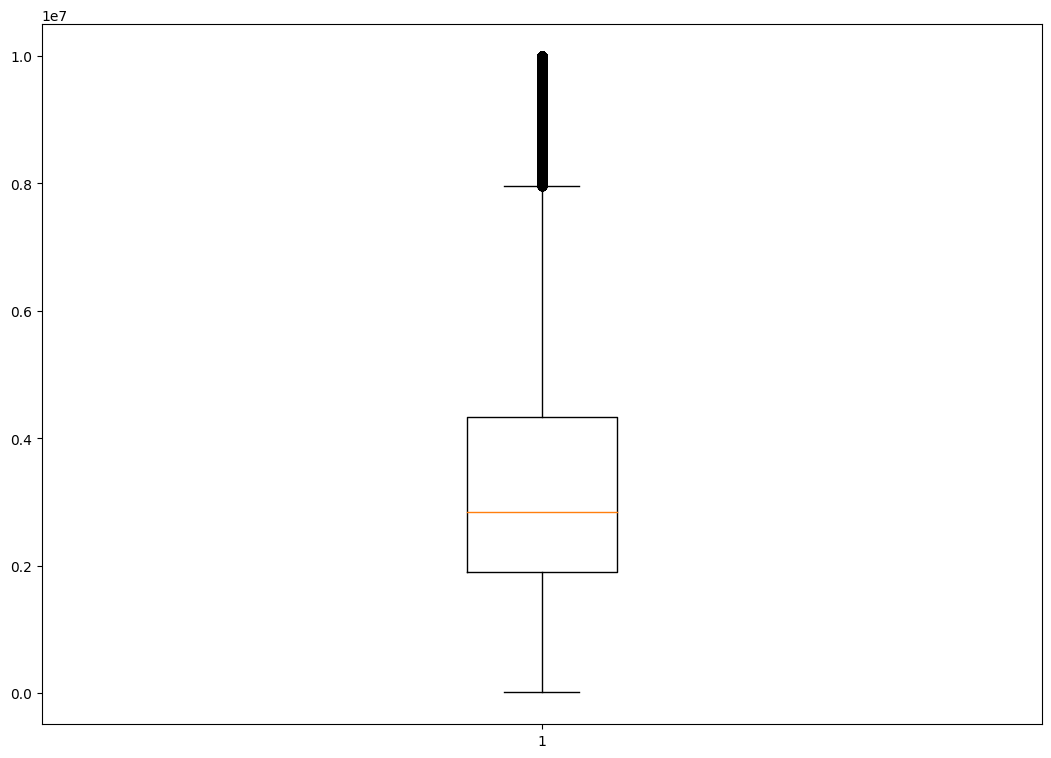

In [ ]:
# Check for outliers in price, levels, rooms, area, and kitcehn area by using boxplot

import matplotlib.pyplot as plt

# 1. Price

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df['price'])
 
# show plot
plt.show()

In [ ]:
# Based on the plot above, it has shown that prices above 70M are considered as outliers, therefore it is better to remove those values
display(df.loc[df['price'] > 7000000])
df = df.drop(df.loc[df['price'] > 7000000].index)
display(df.describe()) 

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
1,8650000,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,2018-02-27
20,8000000,55.738876,37.825370,3,1,5,9,2,45.0,6.0,1,2018-03-17
66,7100000,60.011172,30.243795,2661,3,7,12,3,69.0,11.0,1,2018-05-22
69,8500000,59.849104,30.314112,2661,3,14,14,2,60.0,11.0,1,2018-05-26
117,7101000,59.851307,30.021643,2661,3,3,25,2,63.8,13.0,1,2018-07-16
...,...,...,...,...,...,...,...,...,...,...,...,...
5476974,7504290,55.805465,37.714470,3,2,2,32,0,19.9,5.8,11,2021-05-01
5476977,7293900,55.927587,37.728987,81,2,12,17,3,59.0,5.0,1,2021-05-01
5476993,7136640,55.848186,37.561906,3,1,14,19,0,25.2,6.5,11,2021-05-01
5476997,7200000,59.772947,30.056530,3446,2,2,3,2,59.0,22.3,11,2021-05-01


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06
mean,3.015765e+06,5.371871e+01,5.487736e+01,4.639556e+03,1.950728e+00,5.936546e+00,1.085269e+01,1.670252e+00,4.990684e+01,1.013853e+01,3.833104e+00
std,1.479944e+06,4.717623e+00,2.079483e+01,3.214587e+03,1.056582e+00,4.681859e+00,6.201665e+00,8.230702e-01,1.862483e+01,4.283041e+00,4.506059e+00
min,1.000000e+04,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,1.000000e+00
25%,1.850000e+06,5.261025e+01,3.892658e+01,2.722000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.791000e+01,7.000000e+00,1.000000e+00
50%,2.700000e+06,5.503992e+01,4.747419e+01,3.230000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.600000e+01,9.000000e+00,1.000000e+00
75%,3.900000e+06,5.614931e+01,8.288755e+01,6.817000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,5.950000e+01,1.200000e+01,1.100000e+01
max,7.000000e+06,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.800000e+01,3.900000e+01,3.000000e+00,2.000000e+03,5.000000e+01,1.100000e+01


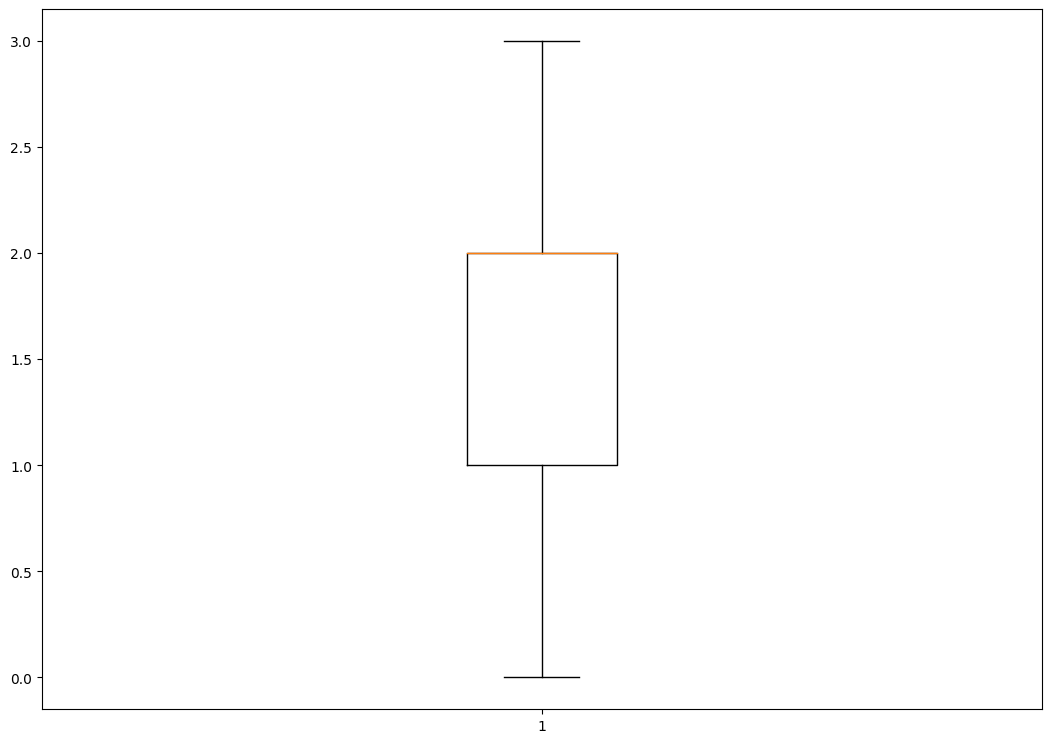

In [ ]:
# 2. Rooms

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df['rooms'])
 
# show plot
plt.show()

In [ ]:
# Based on the plot above, estate with more then 3 living rooms are considered as outliers
display(df.loc[df['rooms'] > 3])
df = df.drop(df.loc[df['rooms'] > 3].index)
display(df.describe()) 

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06,4.443434e+06
mean,3.015765e+06,5.371871e+01,5.487736e+01,4.639556e+03,1.950728e+00,5.936546e+00,1.085269e+01,1.670252e+00,4.990684e+01,1.013853e+01,3.833104e+00
std,1.479944e+06,4.717623e+00,2.079483e+01,3.214587e+03,1.056582e+00,4.681859e+00,6.201665e+00,8.230702e-01,1.862483e+01,4.283041e+00,4.506059e+00
min,1.000000e+04,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,1.000000e+00
25%,1.850000e+06,5.261025e+01,3.892658e+01,2.722000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.791000e+01,7.000000e+00,1.000000e+00
50%,2.700000e+06,5.503992e+01,4.747419e+01,3.230000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.600000e+01,9.000000e+00,1.000000e+00
75%,3.900000e+06,5.614931e+01,8.288755e+01,6.817000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,5.950000e+01,1.200000e+01,1.100000e+01
max,7.000000e+06,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.800000e+01,3.900000e+01,3.000000e+00,2.000000e+03,5.000000e+01,1.100000e+01


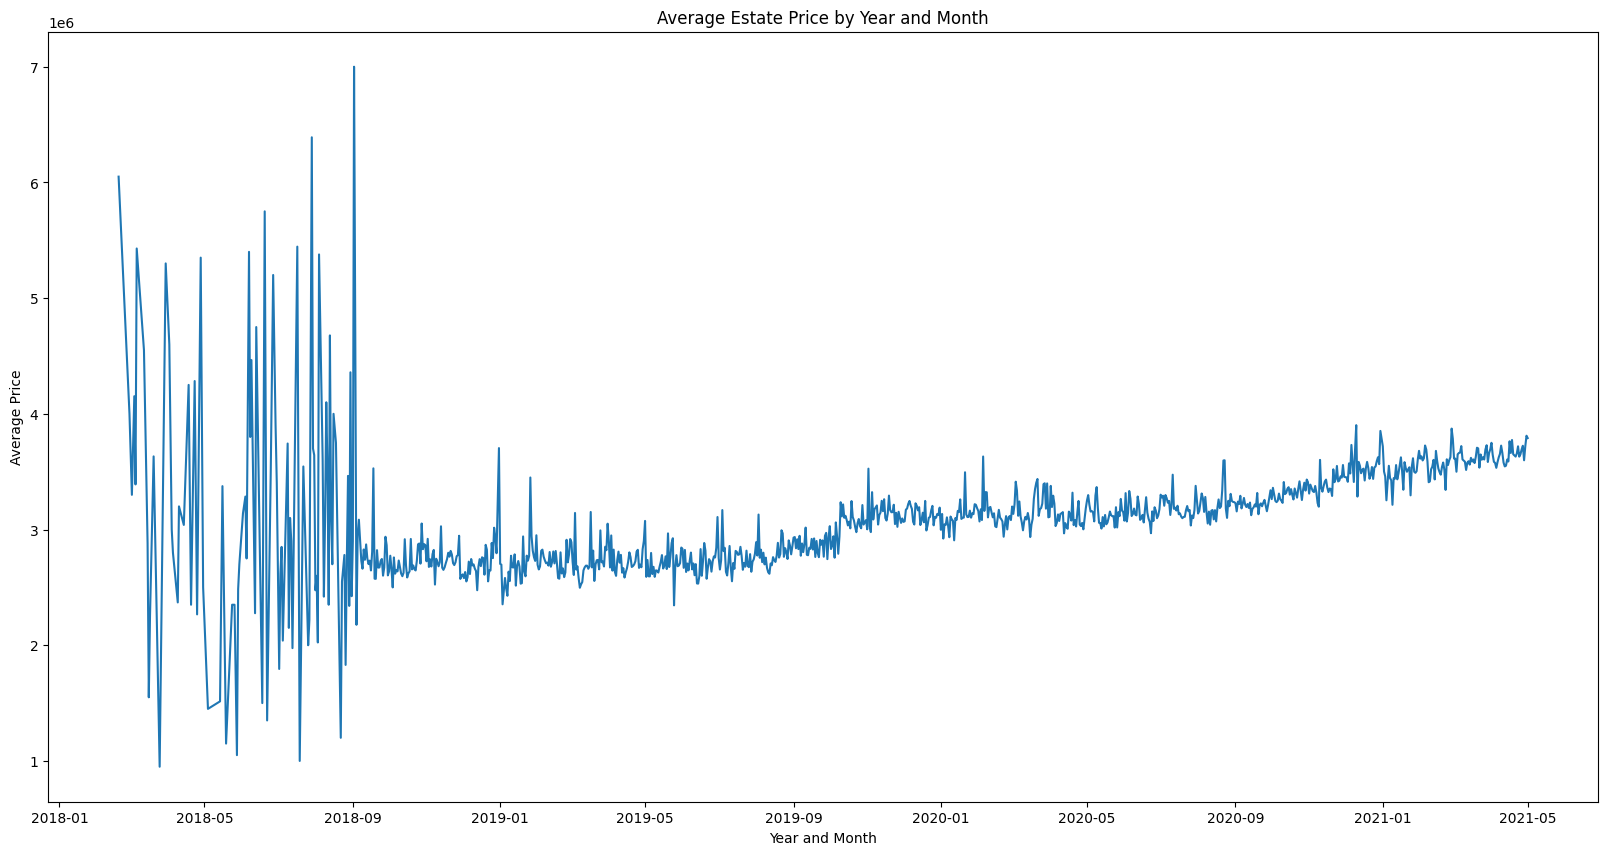

In [ ]:
# group by year_month and calculate the average price
avg_price = df.groupby('date')['price'].mean()

# plot the average price by year and month
plt.figure(figsize=(20, 10))
plt.plot(avg_price.index, avg_price.values)
plt.xlabel('Year and Month')
plt.ylabel('Average Price')
plt.title('Average Estate Price by Year and Month')
plt.show()
# You can actually see that the average price of real estate is steadily increasing starting 2018

In [ ]:
# There is a problem where Google colab runs out of RAM and straight up crashes the whole runtime
# Therefore it is better to just remove some data
# Based on the graph above, it is possible to see the data before 2018 Oct as outliers
# Therefore, we only keep the data after that date
df = df[df['date'] >= '2018-10-01'] 
display(df.head())
print(df.shape)

# Delete date column and change it to year and day in year column
# Extract year and day of year values into new columns
df['year'] = df['date'].dt.year
df = df.drop(['date'], axis=1)

# Even after remove, there's still 4Million of them
# There's a few way to solve this problem. 1: Pay for google colab pro (I'm too poor for this shit), 2: Use AWS (Still too poor), 3: Use Sample for dataset
subset = df.sample(frac=0.2) # Select 20% of the data randomly

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,date
176839,3800000,59.954239,30.474148,2661,1,2,15,1,38.0,10.0,1,2018-10-01
176840,4400000,56.792337,60.634625,6171,1,6,10,3,63.0,8.0,1,2018-10-01
176841,1850000,55.118424,61.466047,5282,1,2,5,2,44.3,7.5,1,2018-10-01
176842,1980000,55.179919,61.299436,5282,1,4,10,1,41.0,9.0,1,2018-10-01
176844,700000,54.432763,61.363073,5282,0,3,3,1,30.0,13.0,1,2018-10-01


(4294765, 12)


In [ ]:
display(subset.head())

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
672449,1870000,54.943577,82.958860,9654,1,8,10,3,86.96,13.0,11,2018
4920331,3500000,53.406277,83.935524,6817,3,1,10,1,58.00,12.0,1,2021
3402340,750000,61.252897,46.633242,6543,3,3,3,2,48.20,10.0,1,2020
2254907,2800000,56.639684,47.828829,4982,3,3,10,2,72.40,12.8,1,2019
454672,900000,57.852637,61.706024,6171,3,3,4,1,29.60,5.7,1,2018


In [ ]:
# Let's look at the subset of the dataset
avg_price = subset.groupby('day_of_year')['price'].mean()

# plot the average price by year and month
plt.figure(figsize=(20, 10))
plt.plot(avg_price.index, avg_price.values)
plt.xlabel('Year and Month')
plt.ylabel('Average Price')
plt.title('Average Estate Price by Year and Month')
plt.show()

display(subset.shape)

KeyError: ignored

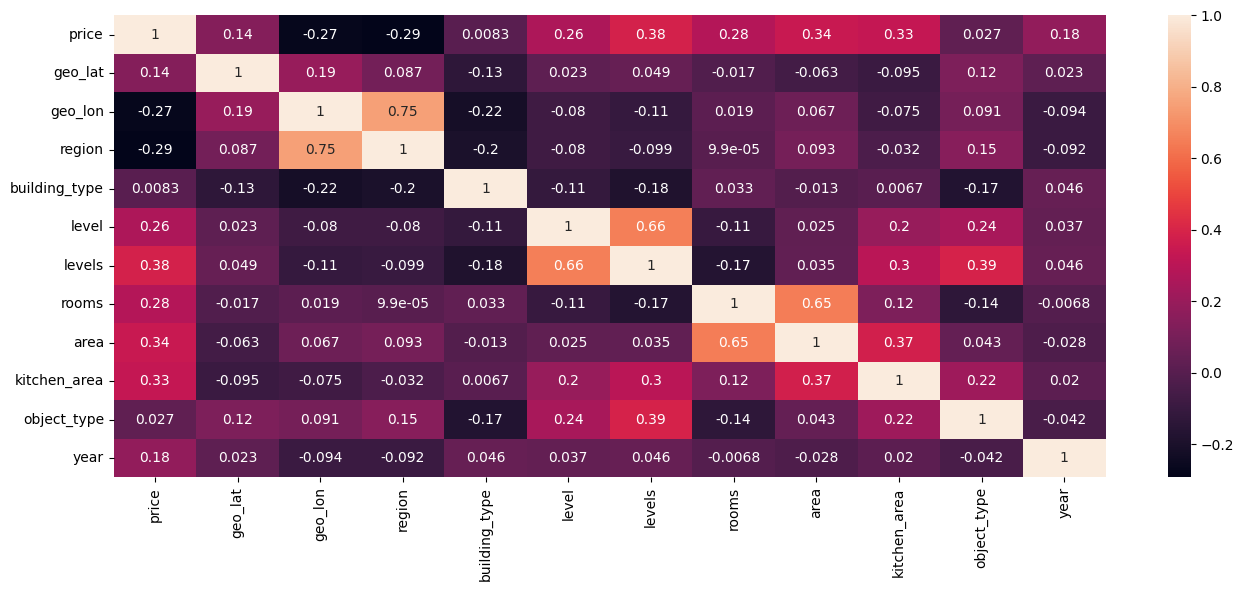

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(subset.corr(), annot=True);

In [ ]:
# Based on the correlation graph, we've decided to drop object_type since it's not relevant enough
# df = df.drop(['object_type'], axis=1)

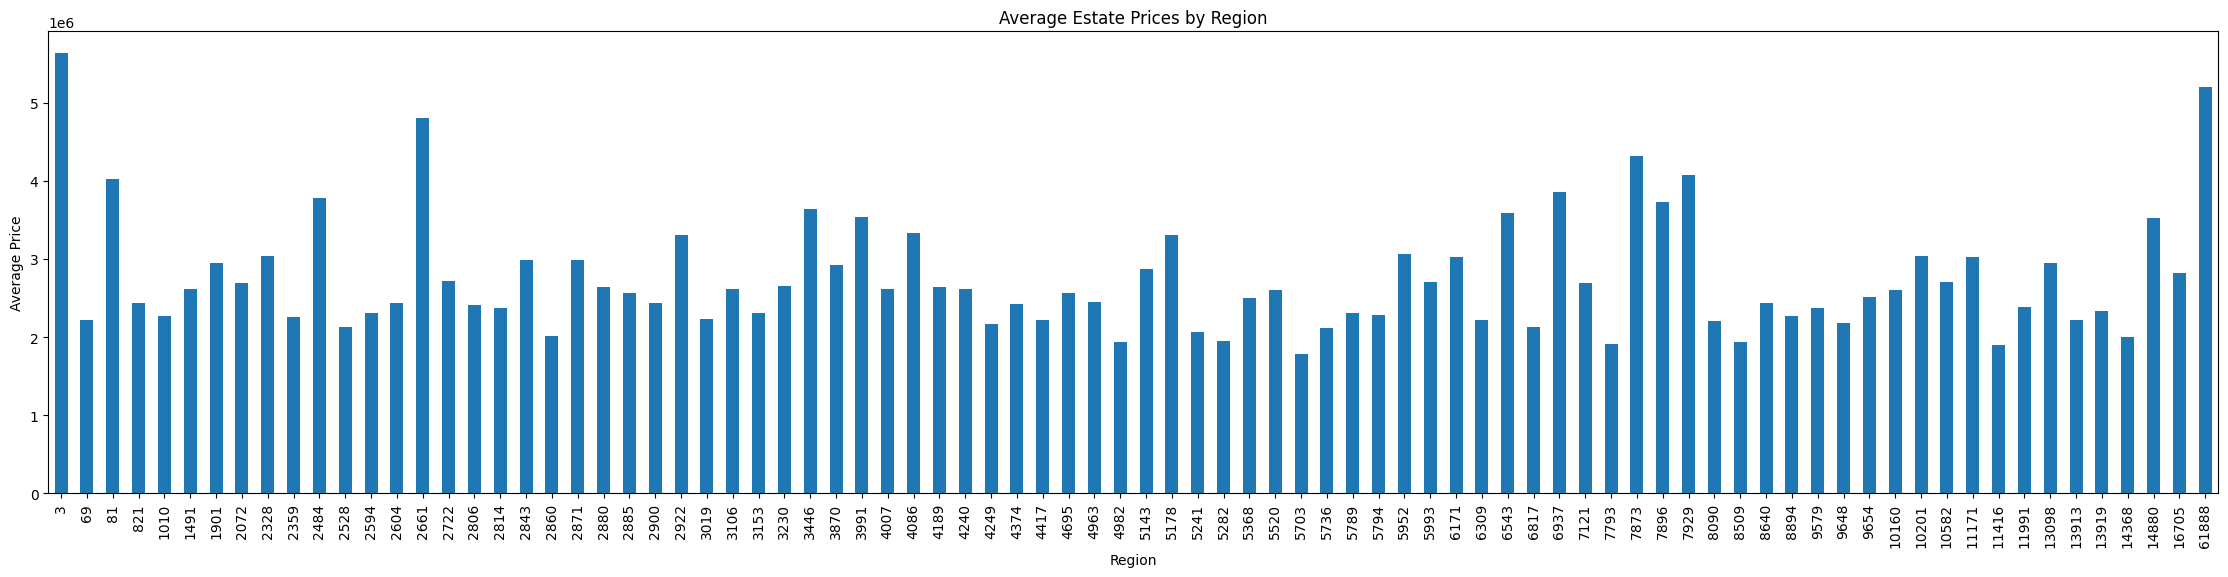

In [ ]:
# Find out the average price in each region
# There is a total of 84 regions in this dataset
avg_prices = subset.groupby(by='region')['price'].mean()

# This shows that there are different average prices based on different regions
fig = plt.figure(figsize=(28, 6))
avg_prices.plot(kind='bar')
plt.title('Average Estate Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

In [ ]:
subset.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
count,8.589530e+05,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000,858953.000000
mean,3.021219e+06,53.710030,54.918076,4643.317945,1.951178,5.931673,10.854317,1.668307,49.893776,10.142479,3.841587,2019.382151
std,1.477819e+06,4.711455,20.805015,3208.186835,1.054610,4.680685,6.203267,0.824419,18.703878,4.290687,4.510131,0.837310
min,1.000000e+04,41.459089,19.890196,3.000000,0.000000,1.000000,1.000000,0.000000,10.000000,5.000000,1.000000,2018.000000
25%,1.850000e+06,52.538085,38.931215,2722.000000,1.000000,2.000000,5.000000,1.000000,37.900000,7.000000,1.000000,2019.000000
50%,2.700000e+06,55.038734,47.492297,3230.000000,2.000000,5.000000,10.000000,2.000000,46.000000,9.000000,1.000000,2019.000000
75%,3.900000e+06,56.147076,82.886287,6817.000000,3.000000,8.000000,16.000000,2.000000,59.500000,12.000000,11.000000,2020.000000
max,7.000000e+06,69.636737,162.536078,61888.000000,5.000000,36.000000,39.000000,3.000000,1500.000000,50.000000,11.000000,2021.000000


In [ ]:
!apt-get -qq install libproj-dev libgeos-dev
!pip install -q cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.2 MB/s eta 0:00:00


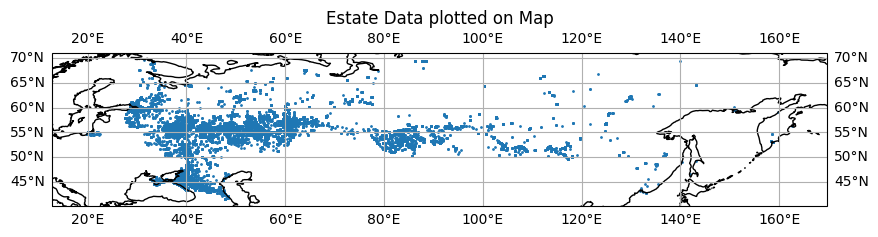

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# Create map figure and axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot data on map
ax.scatter(subset['geo_lon'], subset['geo_lat'], s=1, transform=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Estate Data plotted on Map')

# Show the plot
plt.show()

# Test 1: Use one model to forecast price for all regions


In [ ]:
# To fit in the LSTM model, we need to convert the date column to numerical datatype so that it is able to pass in as an input
# subset['date'] = subset['date'].apply(lambda x: x.timestamp())

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
import numpy as np

X = subset.iloc[:, 1:].values
y = subset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
print(X_train[0])
print(y_train)

[5.58715038e+01 4.90810998e+01 2.92200000e+03 3.00000000e+00
 5.00000000e+00 5.00000000e+00 1.00000000e+00 2.95000000e+01
 5.50000000e+00 1.00000000e+00 2.02000000e+03]
[2550000 3099900 1550000 ... 2750000 2150000 2370000]


In [ ]:



X.shape, y.shape

((858953, 11), (858953,))

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858953 entries, 1353670 to 1063097
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          858953 non-null  int64  
 1   geo_lat        858953 non-null  float64
 2   geo_lon        858953 non-null  float64
 3   region         858953 non-null  int64  
 4   building_type  858953 non-null  int64  
 5   level          858953 non-null  int64  
 6   levels         858953 non-null  int64  
 7   rooms          858953 non-null  int64  
 8   area           858953 non-null  float64
 9   kitchen_area   858953 non-null  float64
 10  object_type    858953 non-null  int64  
 11  year           858953 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 85.2 MB


In [ ]:
# Check data shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((687162, 11), (687162,), (171791, 11), (171791,))

In [ ]:
# Scale data, (Optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale down y 
y_train_scaled = np.divide(y_train, 1000000)
y_test_scaled = np.divide(y_test, 1000000)

# Add a dimension into X so that it is able to fit into the RNN
# This step is required because of RNN input requirement, the data must be 3D
X_train_scaled = np.expand_dims(X_train_scaled, axis=1)
X_test_scaled = np.expand_dims(X_test_scaled, axis=1)

# Model Training Part <br/>
===============================================

In [ ]:
!pip install deap
!pip install bitstring

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 8.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 KB 5.9 MB/s eta 0:00:00


In [ ]:
# Genetic Algorithm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split

from keras.models import Sequential, Model
from keras.layers import Dense, SimpleRNN,LeakyReLU
from keras.wrappers.scikit_learn import KerasRegressor
from keras.metrics import RootMeanSquaredError
import numpy as np

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray

np.random.seed(1120)

def train_evaluate(ga_individual_solution):   
    # Decode GA solution to integer for window_size and num_units
    num_units_bits = BitArray(ga_individual_solution[6:]) 
    num_units = num_units_bits.uint
    print('Num of Units: ', num_units)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if num_units == 0:
        return 100, 
    
    # Train RNN model and predict on validation set
    model = Sequential()
    model.add(SimpleRNN(num_units, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu', return_sequences=True))
    model.add(SimpleRNN(num_units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='rmsprop',loss='mean_absolute_error')
    model.fit(X_train_scaled, y_train_scaled, epochs=5,validation_split=0.1,shuffle=True)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))
    print('Validation RMSE: ', rmse,'\n')
    
    return rmse,

population_size = 10
num_generations = 5
gene_length = 10

###################################################################################
# As we are trying to minimize the RMSE score, that's why using -1.0. 
# In case, when you want to maximize accuracy for instance, use 1.0
creator.create('FitnessMax', base.Fitness, weights = (-1.0,))
creator.create('Individual', list , fitness = creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, 
n = gene_length)
toolbox.register('population', tools.initRepeat, list , toolbox.individual)
toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.6)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

population = toolbox.population(n = population_size)
r = algorithms.eaSimple(population, toolbox, cxpb = 0.4, mutpb = 0.1, 
ngen = num_generations, verbose = False)

###################################################################################
# Print top N solutions - (1st only, for now)
# Modify k to select the best k of individuals
best_individuals = tools.selBest(population,k = 10)
best_window_size = None
best_num_units = None
print(best_individuals)
for bi in best_individuals:
    num_units_bits = BitArray(bi[6:]) 
    best_num_units = num_units_bits.uint
    print('Best Num of Units: ', best_num_units) 

Num of Units:  2
Epoch 1/5
19327/19327 [==============================] - 236s 11ms/step - loss: 1.2704 - val_loss: 1.1761
Epoch 2/5
19327/19327 [==============================] - 191s 10ms/step - loss: 1.1754 - val_loss: 1.1760
Epoch 3/5
19327/19327 [==============================] - 194s 10ms/step - loss: 1.1754 - val_loss: 1.1762
Epoch 4/5
19327/19327 [==============================] - 194s 10ms/step - loss: 1.1754 - val_loss: 1.1760
Epoch 5/5
5369/5369 [==============================] - 19s 3ms/step
Validation RMSE:  1.5114248231470526 

Num of Units:  8
Epoch 1/5
19327/19327 [==============================] - 202s 10ms/step - loss: 0.7207 - val_loss: 0.6618
Epoch 2/5
19327/19327 [==============================] - 187s 10ms/step - loss: 0.6548 - val_loss: 0.6382
Epoch 3/5
19327/19327 [==============================] - 176s 9ms/step - loss: 0.6342 - val_loss: 0.6348
Epoch 4/5
19327/19327 [==============================] - 173s 9ms/step - loss: 0.6196 - val_loss: 0.6108
Epoch 5/5
536

In [ ]:
# Model with 1 Number of Hidden layer (NHL)
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LeakyReLU
from keras.wrappers.scikit_learn import KerasRegressor
from keras.metrics import RootMeanSquaredError
import numpy as np

modelnhl1 = Sequential()
# 9 neurons (based on the result of GA algorithm)
modelnhl1.add(SimpleRNN(9, input_dim=X_train_scaled.shape[2], activation='relu'))
modelnhl1.add(Dense(1, activation='linear'))

modelnhl1.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 9)                 189       
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape

(687162, 11)

In [ ]:
nhl1 = modelnhl1.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

Epoch 1/50
19327/19327 [==============================] - 70s 3ms/step - loss: 0.7533 - mape: 33.4567 - mae: 0.7533 - root_mean_squared_error: 1.0807 - val_loss: 0.6973 - val_mape: 31.9543 - val_mae: 0.6973 - val_root_mean_squared_error: 0.9673
Epoch 2/50
19327/19327 [==============================] - 53s 3ms/step - loss: 0.6940 - mape: 31.2939 - mae: 0.6940 - root_mean_squared_error: 0.9789 - val_loss: 0.6883 - val_mape: 30.9168 - val_mae: 0.6883 - val_root_mean_squared_error: 0.9633
Epoch 3/50
19327/19327 [==============================] - 53s 3ms/step - loss: 0.6853 - mape: 31.0885 - mae: 0.6853 - root_mean_squared_error: 0.9574 - val_loss: 0.6792 - val_mape: 31.0515 - val_mae: 0.6792 - val_root_mean_squared_error: 0.9356
Epoch 4/50
19327/19327 [==============================] - 53s 3ms/step - loss: 0.6799 - mape: 30.8125 - mae: 0.6799 - root_mean_squared_error: 0.9425 - val_loss: 0.6774 - val_mape: 29.9176 - val_mae: 0.6774 - val_root_mean_squared_error: 0.9280
Epoch 5/50
19327/193

In [ ]:
# Model with 2 NHL
modelnhl2 = Sequential()
modelnhl2.add(SimpleRNN(10, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
modelnhl2.add(SimpleRNN(10, activation='relu'))
modelnhl2.add(Dense(1, activation='linear'))

modelnhl2.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 10)          220       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nhl2 = modelnhl2.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

Epoch 1/50
19327/19327 [==============================] - 67s 3ms/step - loss: 0.7264 - mape: 32.9294 - mae: 0.7264 - root_mean_squared_error: 1.0490 - val_loss: 0.6726 - val_mape: 30.1096 - val_mae: 0.6726 - val_root_mean_squared_error: 0.9452
Epoch 2/50
19327/19327 [==============================] - 63s 3ms/step - loss: 0.6643 - mape: 30.3766 - mae: 0.6643 - root_mean_squared_error: 0.9368 - val_loss: 0.6569 - val_mape: 28.7437 - val_mae: 0.6569 - val_root_mean_squared_error: 0.9223
Epoch 3/50
19327/19327 [==============================] - 66s 3ms/step - loss: 0.6478 - mape: 29.6358 - mae: 0.6478 - root_mean_squared_error: 0.9031 - val_loss: 0.6400 - val_mape: 28.4224 - val_mae: 0.6400 - val_root_mean_squared_error: 0.8869
Epoch 4/50
19327/19327 [==============================] - 66s 3ms/step - loss: 0.6313 - mape: 28.9706 - mae: 0.6313 - root_mean_squared_error: 0.8727 - val_loss: 0.6223 - val_mape: 28.8763 - val_mae: 0.6223 - val_root_mean_squared_error: 0.8588
Epoch 5/50
19327/193

In [ ]:
# Model with 3 NHL
modelnhl3 = Sequential()
modelnhl3.add(SimpleRNN(9, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
modelnhl3.add(SimpleRNN(9, activation='relu', return_sequences=True))
modelnhl3.add(SimpleRNN(9, activation='relu'))
modelnhl3.add(Dense(1, activation='linear'))

modelnhl3.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, None, 9)           189       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 9)           171       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nhl3 = modelnhl3.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

Epoch 1/50
19327/19327 [==============================] - 82s 4ms/step - loss: 0.7106 - mape: 32.1609 - mae: 0.7106 - root_mean_squared_error: 1.0071 - val_loss: 0.6733 - val_mape: 31.1365 - val_mae: 0.6733 - val_root_mean_squared_error: 0.9402
Epoch 2/50
19327/19327 [==============================] - 76s 4ms/step - loss: 0.6678 - mape: 30.3831 - mae: 0.6678 - root_mean_squared_error: 0.9388 - val_loss: 0.6623 - val_mape: 30.5030 - val_mae: 0.6623 - val_root_mean_squared_error: 0.9234
Epoch 3/50
19327/19327 [==============================] - 84s 4ms/step - loss: 0.6575 - mape: 30.0184 - mae: 0.6575 - root_mean_squared_error: 0.9276 - val_loss: 0.6577 - val_mape: 28.5933 - val_mae: 0.6577 - val_root_mean_squared_error: 0.9223
Epoch 4/50
19327/19327 [==============================] - 75s 4ms/step - loss: 0.6436 - mape: 29.4789 - mae: 0.6436 - root_mean_squared_error: 0.9058 - val_loss: 0.6413 - val_mape: 29.5767 - val_mae: 0.6413 - val_root_mean_squared_error: 0.8943
Epoch 5/50
19327/193

In [ ]:
# Model with 4 NHL
modelnhl4 = Sequential()
modelnhl4.add(SimpleRNN(2, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
modelnhl4.add(SimpleRNN(2, activation='relu', return_sequences=True))
modelnhl4.add(SimpleRNN(2, activation='relu', return_sequences=True))
modelnhl4.add(SimpleRNN(2, activation='relu'))
modelnhl4.add(Dense(1, activation='linear'))

modelnhl4.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 2)           28        
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 2)           10        
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 2)           10        
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nhl4 = modelnhl4.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

Epoch 1/50
19327/19327 [==============================] - 91s 5ms/step - loss: 1.2693 - mape: 51.8674 - mae: 1.2693 - root_mean_squared_error: 1.6581 - val_loss: 1.1698 - val_mape: 50.7927 - val_mae: 1.1698 - val_root_mean_squared_error: 1.5055
Epoch 2/50
19327/19327 [==============================] - 78s 4ms/step - loss: 1.1747 - mape: 50.7629 - mae: 1.1747 - root_mean_squared_error: 1.5126 - val_loss: 1.1699 - val_mape: 50.4066 - val_mae: 1.1699 - val_root_mean_squared_error: 1.5099
Epoch 3/50
19327/19327 [==============================] - 80s 4ms/step - loss: 1.1747 - mape: 50.7511 - mae: 1.1747 - root_mean_squared_error: 1.5128 - val_loss: 1.1698 - val_mape: 50.6331 - val_mae: 1.1698 - val_root_mean_squared_error: 1.5073
Epoch 4/50
19327/19327 [==============================] - 81s 4ms/step - loss: 1.1747 - mape: 50.7567 - mae: 1.1747 - root_mean_squared_error: 1.5127 - val_loss: 1.1698 - val_mape: 50.7016 - val_mae: 1.1698 - val_root_mean_squared_error: 1.5065
Epoch 5/50
19327/193

KeyboardInterrupt: ignored

In [ ]:
# Model with 5 NHL
modelnhl5 = Sequential()
modelnhl5.add(SimpleRNN(2, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
modelnhl5.add(SimpleRNN(2, activation='relu', return_sequences=True))
modelnhl5.add(SimpleRNN(2, activation='relu', return_sequences=True))
modelnhl5.add(SimpleRNN(2, activation='relu', return_sequences=True))
modelnhl5.add(SimpleRNN(2, activation='relu'))
modelnhl5.add(Dense(1, activation='linear'))

modelnhl5.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl5.summary()

In [ ]:
nhl5 = modelnhl5.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

In [ ]:
# Model with 10 NHL
modelnhl10 = Sequential()
modelnhl10.add(SimpleRNN(12, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl10.add(SimpleRNN(1, activation='relu'))
modelnhl10.add(Dense(1, activation='linear'))

modelnhl10.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl10.summary()

In [ ]:
nhl10 = modelnhl10.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

In [ ]:
# Model with 15 NHL
modelnhl15 = Sequential()
modelnhl15.add(SimpleRNN(1, input_dim=X_train_scaled.shape[2], activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='relu', return_sequences=True))
modelnhl15.add(SimpleRNN(1, activation='linear'))

modelnhl15.compile(optimizer = "rmsprop", loss = "mean_absolute_error", metrics=['mape', 'mae', RootMeanSquaredError()])
modelnhl15.summary()

In [ ]:
nhl15 = modelnhl15.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50)

In [ ]:
# assuming your input data is stored in a variable called 'data'
print(X_train.shape)
# add a batch dimension
data = np.expand_dims(X_train, axis=1)
print(data.shape)

In [ ]:

predictions = modelnhl20.predict(X_test_scaled[:10])
print(f"Predicted value: \n{predictions}")
print(f"Real value: {y_test[:10]}")

In [ ]:
print(nhl1.history)

{'loss': [0.7533217668533325, 0.6939868927001953, 0.6852946281433105, 0.6798885464668274, 0.6768636703491211, 0.6746158599853516, 0.6725457906723022, 0.6710177659988403, 0.6691473722457886, 0.6664667129516602, 0.6646515130996704, 0.6635730266571045, 0.662781834602356, 0.6622859835624695, 0.6617780327796936, 0.661178469657898, 0.6602271795272827, 0.6595858335494995, 0.6591588854789734, 0.6589488983154297, 0.6587914824485779, 0.6584982872009277, 0.6580613851547241, 0.6576353311538696, 0.6564144492149353, 0.6547126173973083, 0.6542182564735413, 0.653847336769104, 0.6536701321601868, 0.6533901691436768, 0.6534065008163452, 0.6530666351318359, 0.6527926921844482, 0.6527599692344666, 0.6527172923088074, 0.652606725692749, 0.6524590253829956, 0.652608335018158, 0.652457594871521, 0.652282178401947, 0.6523701548576355, 0.6523355841636658, 0.6524222493171692, 0.6523769497871399, 0.652230441570282, 0.6522441506385803, 0.6521287560462952, 0.6522935628890991, 0.6521380543708801, 0.6521391868591309

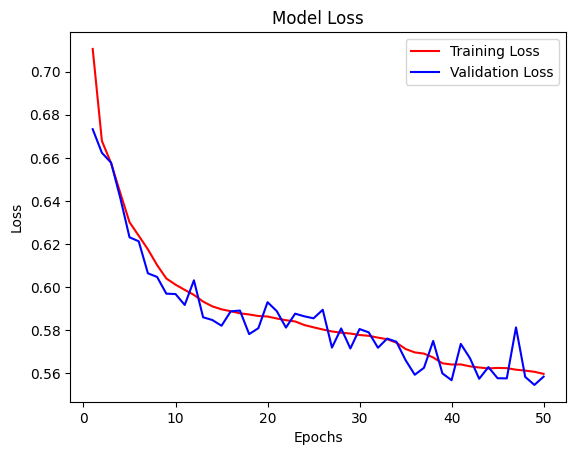

<Figure size 640x480 with 0 Axes>

In [ ]:

epochs = range(1,51)
plt.plot(epochs, nhl3.history['loss'], 'r', label='Training Loss')
plt.plot(epochs, nhl3.history['val_loss'], 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/My Drive/my_figure.pdf')